In [2]:
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)

In [3]:
houses = tbl_df(read.csv("../kagel-house-prices-data/train.csv", stringsAsFactors = FALSE))

In [31]:
LotFrontage = houses %>% select(LotFrontage) %>% na.omit() %>% rename(x=LotFrontage)
LotFrontage = LotFrontage %>% mutate(x_log=log(x))
head(LotFrontage)

,x,x_log
1,65,4.174387
2,80,4.382027
3,68,4.219508
4,60,4.094345
5,84,4.430817
6,85,4.442651


In [47]:
get_hist_binwidth <- function(df, col_name){
    x = df %>% .[[col_name]]
    q25 = quantile(x, 0.25)[[1]]
    q75 = quantile(x, 0.75)[[1]]
    n = length(x)
    return(2 * (q75 - q25) * (n ** (- 1/3)))
}


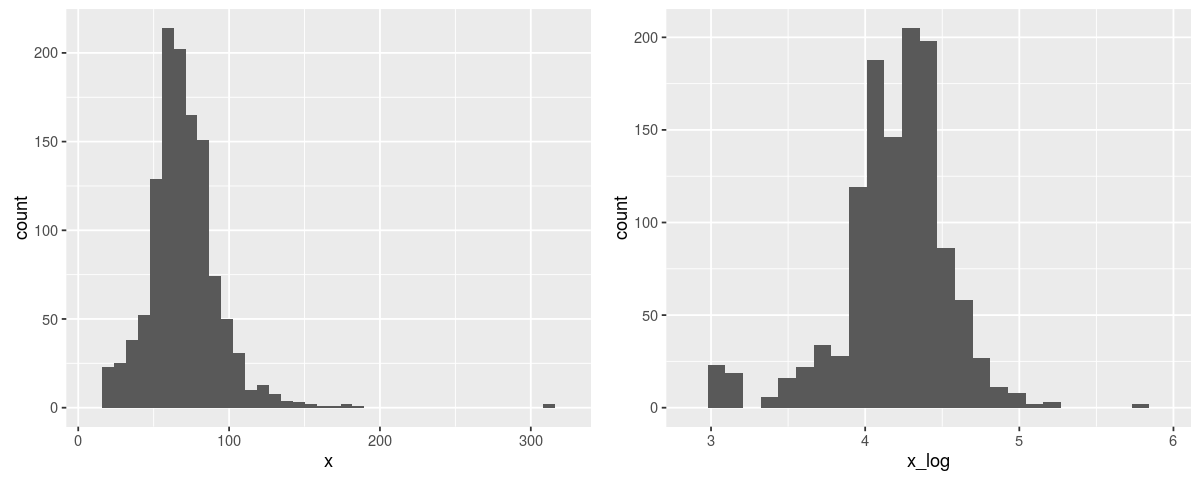

In [50]:
options(repr.plot.width = 10, repr.plot.height = 4)

g1 = ggplot(LotFrontage, aes(x))
g1 = g1 + geom_histogram(binwidth=2*get_hist_binwidth(LotFrontage, "x"))

g2 = ggplot(LotFrontage, aes(x_log))
g2 = g2 + geom_histogram(binwidth=2*get_hist_binwidth(LotFrontage, "x_log"))

grid.arrange(g1, g2, layout_matrix=rbind(c(1, 2)))